In [122]:
import pandas as pd
import numpy as np 
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [123]:
df=pd.read_csv('iris.csv')

In [124]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [125]:
df.size

750

In [126]:
df.shape

(150, 5)

In [127]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [128]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [129]:
df.duplicated().sum()

1

In [130]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [131]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [132]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [134]:
df['species']=df['species'].astype('category')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


# Handling the duplicates

In [136]:
df.duplicated().sum()

1

In [137]:
df['sepal_length'].duplicated().sum()

115

In [138]:
dup_mask=df['sepal_length'].duplicated()

In [139]:
median_value=df['sepal_length'].median()
df.loc[dup_mask,'sepal_length']=df.loc[dup_mask,'sepal_length']+np.random.normal(0,0.1,dup_mask.sum())

In [140]:
df['sepal_length'].duplicated().sum()

0

In [141]:
df['sepal_width'].duplicated().sum()

127

In [142]:
dup_mask=df['sepal_width'].duplicated()


In [143]:
median_value=df['sepal_width'].median()
df.loc[dup_mask,'sepal_width']=df.loc[dup_mask,'sepal_width']+np.random.normal(0,0.1,dup_mask.sum())

In [144]:
df['sepal_width'].duplicated().sum()

0

In [145]:
df['petal_length'].duplicated().sum()

107

In [146]:
dup_mask=df['petal_length'].duplicated()

In [147]:
median_value=df['petal_length'].median()
df.loc[dup_mask,'petal_length']=df.loc[dup_mask,'petal_length']+np.random.normal(0,0.1,dup_mask.sum())

In [148]:
df['petal_length'].duplicated().sum()

0

In [149]:
df['petal_width'].duplicated().sum()

128

In [150]:
dup_mask=df['petal_width'].duplicated()

In [151]:
median_value=df['petal_width'].median()
df.loc[dup_mask,'petal_width']=df.loc[dup_mask,'petal_width']+np.random.normal(0,0.1,dup_mask.sum())

In [152]:
df['petal_width'].duplicated().sum()

0

In [153]:
df.duplicated().sum()

0

# Univarient analysis

In [154]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [155]:
def check_gaussian(data):
    sns.distplot(data,kde=True)
    plt.show()
    stats.probplot(df['sepal_length'],dist='norm',plot=plt)
    plt.show()
    a=stats.anderson(data,dist='norm')
    if (a.statistic>a.critical_values[2]):
        print('column is non-gaussian')
    else:
        print('column is gaussian')

C:\Users\shiva\AppData\Local\Temp\ipykernel_3080\2198326130.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


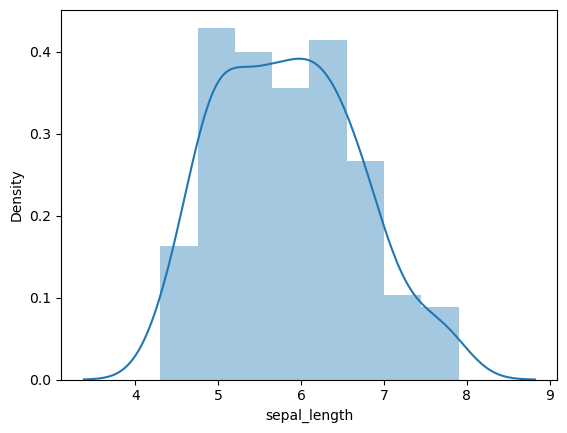

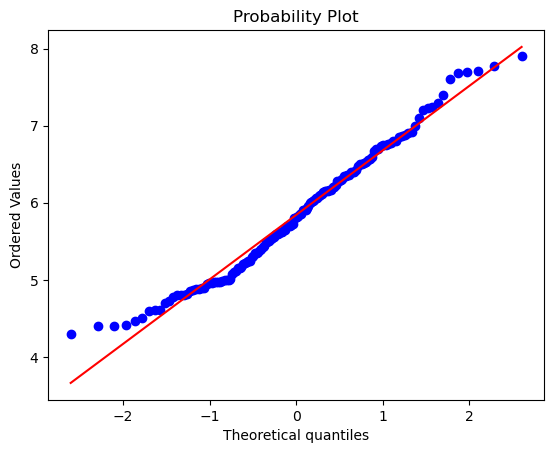

column is non-gaussian


In [156]:
check_gaussian(df['sepal_length'])

<Axes: ylabel='sepal_length'>

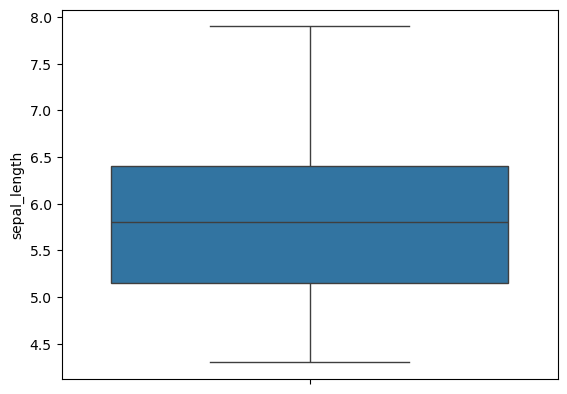

In [157]:
sns.boxplot(df['sepal_length'])

<Axes: xlabel='species', ylabel='sepal_length'>

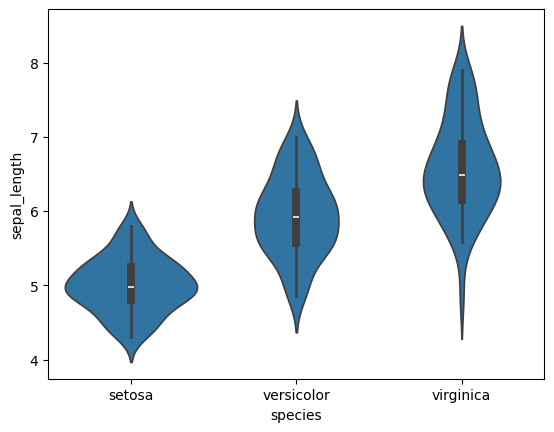

In [158]:
sns.violinplot(x='species',y='sepal_length',data=df)

# sepal_length
#### The distribution is Gaussian
#### There is no outliers 
#### Most of the points concentrated in between  5.2 to 6.5
#### virginica has the highest median sepal length among three species
#### versicolor has medium median sepal length
#### setosa has low median sepal length
#### overall sepal length increases from setosa ->versicolor->virginica

C:\Users\shiva\AppData\Local\Temp\ipykernel_3080\2198326130.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


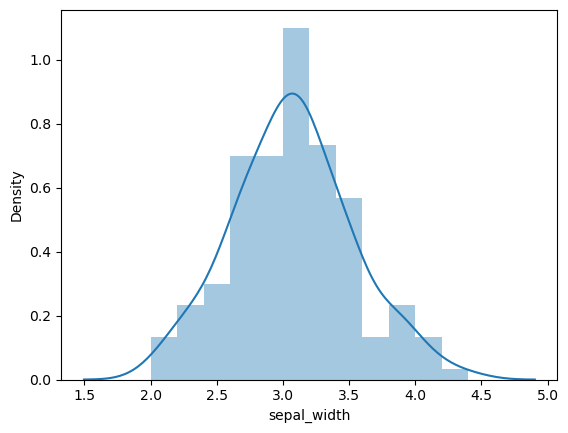

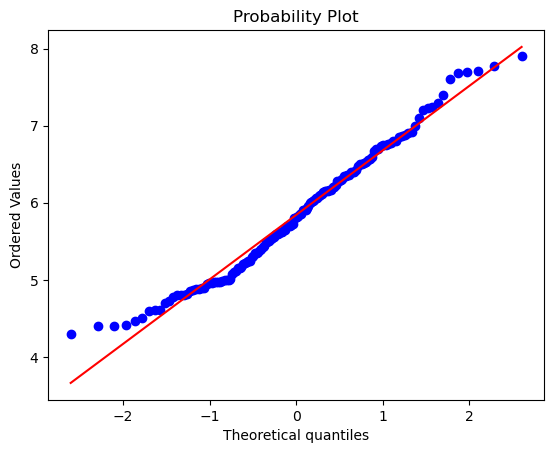

column is gaussian


In [159]:
check_gaussian(df['sepal_width'])

<Axes: ylabel='sepal_width'>

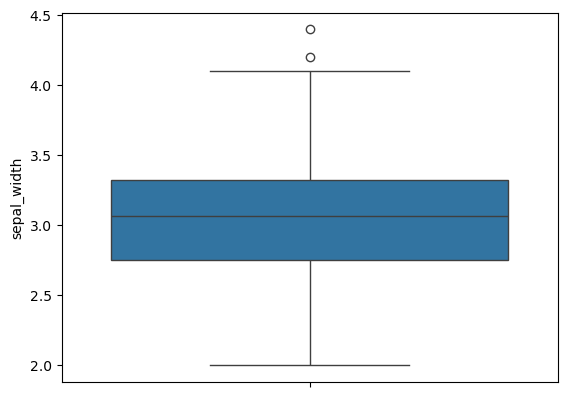

In [160]:
sns.boxplot(df['sepal_width'])

In [161]:
from scipy.stats import zscore
threshold=3
z_score=zscore(df['sepal_width'])
abs_z=np.abs(z_score)
df=df[abs_z<threshold]

<Axes: ylabel='sepal_width'>

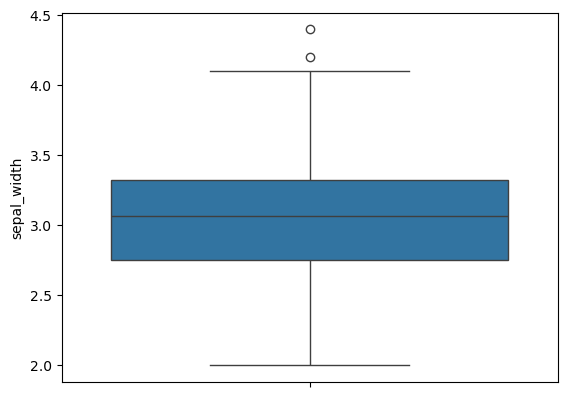

In [162]:
sns.boxplot(df['sepal_width'])

<Axes: xlabel='sepal_width', ylabel='Density'>

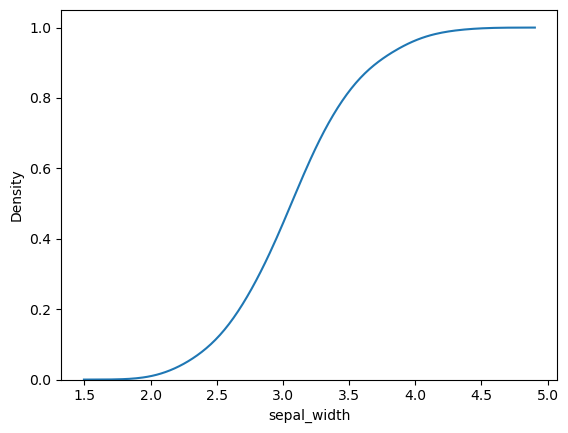

In [163]:
sns.kdeplot(df['sepal_width'],cumulative=True,label='sepal_width')

<Axes: xlabel='species', ylabel='sepal_width'>

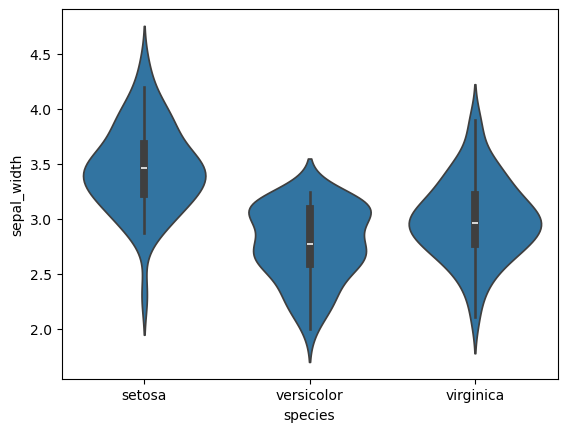

In [164]:
sns.violinplot(x='species',y='sepal_width',data=df)

# sepal_width
#### The distribution is gaussian
#### one outliers is there we handled with the help of z_score
#### setosa has the higest medain range of sepal width amnog three species
#### virginica and virsicolr has the medium range sepal width among three species

C:\Users\shiva\AppData\Local\Temp\ipykernel_3080\2198326130.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


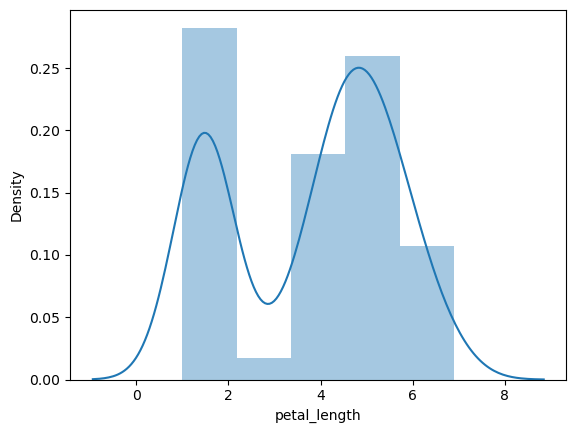

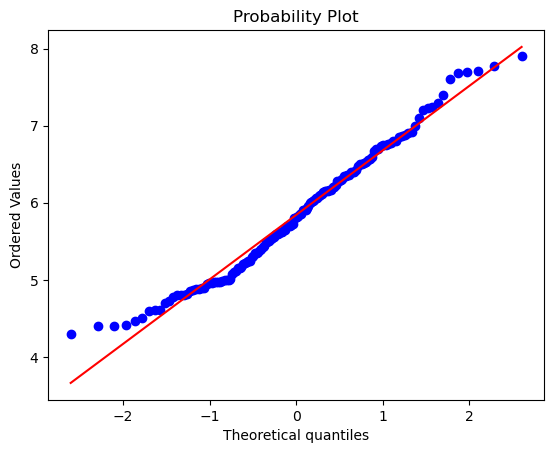

column is non-gaussian


In [165]:
check_gaussian(df['petal_length'])

<Axes: ylabel='petal_length'>

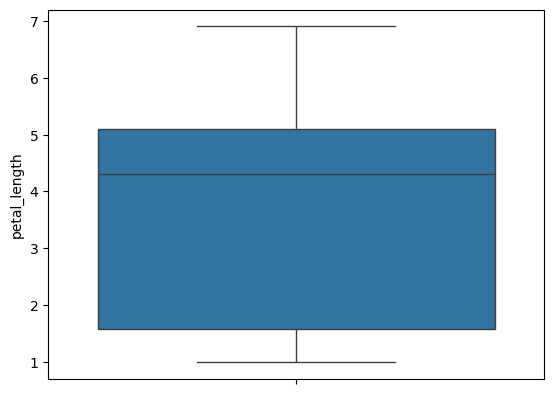

In [166]:
sns.boxplot(df['petal_length'])

<Axes: xlabel='species', ylabel='petal_length'>

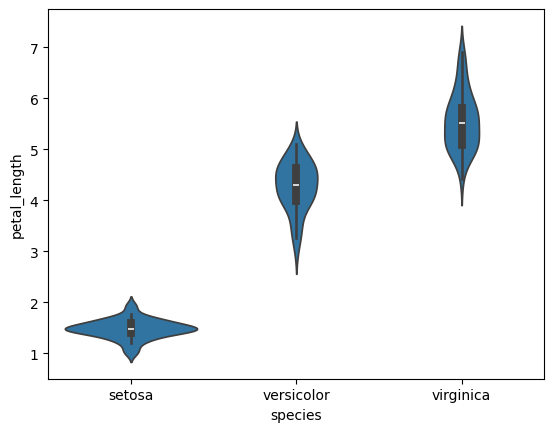

In [167]:
sns.violinplot(x='species',y='petal_length',data=df)

# petal_length
#### The distribution is not normal it is a multimodal
#### The distribution is non gaussian distributiom
#### NO outliers 
#### virginica has the highest median range of petal_length among three species
#### versicolor has the medium median petal_length range
#### setosa has the low medium petal_length range 
#### overall petal_length increases from setosa -> versicolor -> virginica

C:\Users\shiva\AppData\Local\Temp\ipykernel_3080\2198326130.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


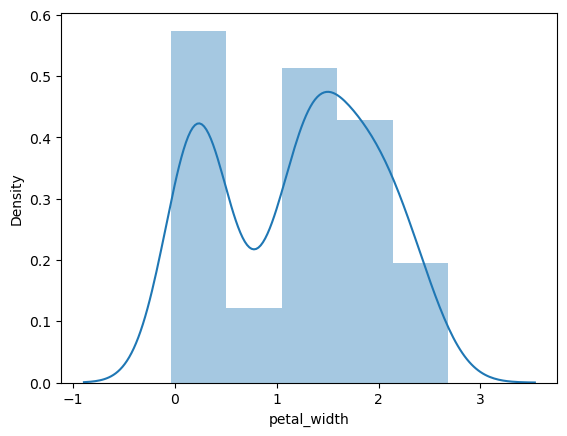

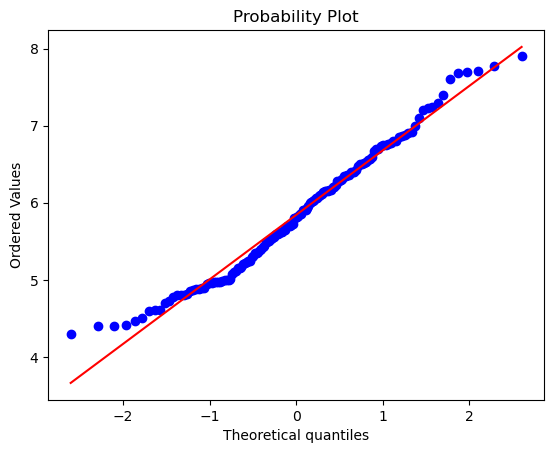

column is non-gaussian


In [168]:
check_gaussian(df['petal_width'])

<Axes: ylabel='petal_width'>

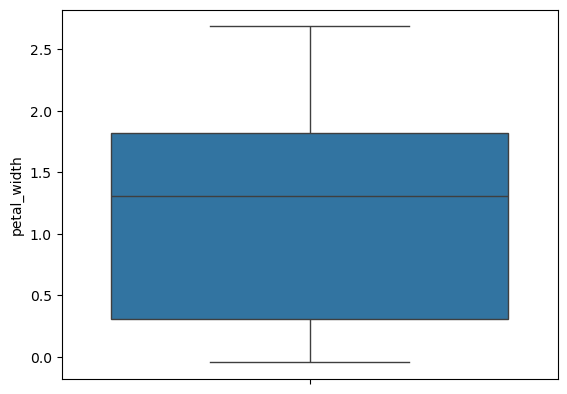

In [169]:
sns.boxplot(df['petal_width'])

<Axes: xlabel='species', ylabel='petal_width'>

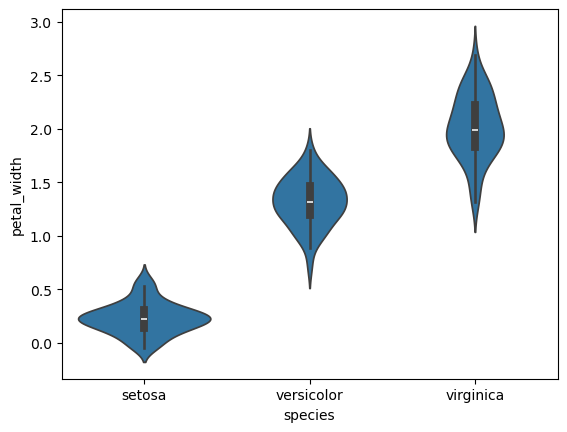

In [170]:
sns.violinplot(x='species',y='petal_width',data=df)

# petal_width
#### The distribution is not normal it is a multimodal
#### The distribution is non gaussian distributiom
#### NO outliers 
#### virginica has the highest median range of petal_width among three species
#### versicolor has the medium median petal_width range
#### setosa has the low medium petal_width range 
#### overall petal_width increases from setosa -> versicolor -> virginica

<Axes: xlabel='species', ylabel='count'>

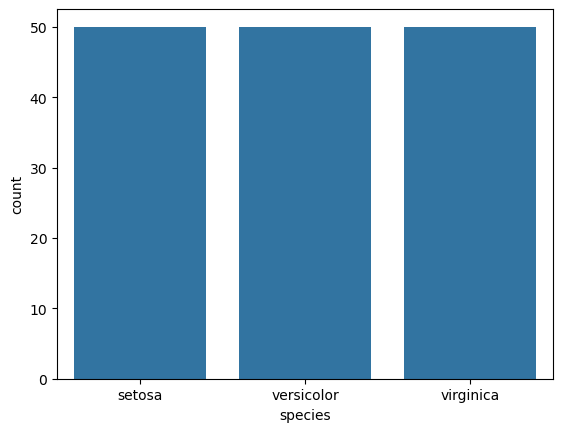

In [171]:
sns.countplot(x='species',data=df)

# Bivarient analysis

In [172]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

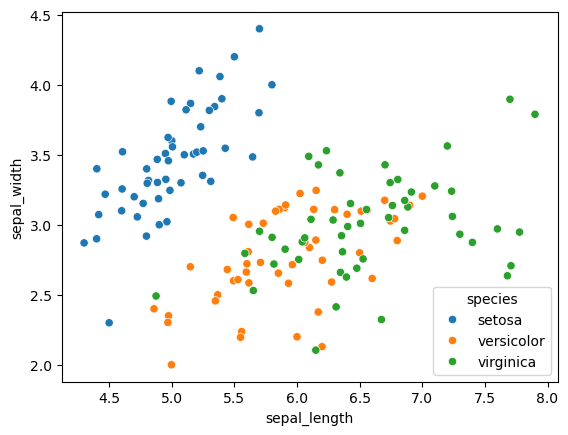

In [173]:
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='species')

#### setosa is separable from versicolor and virginica 
#### versicolr and virginica are overalpping with each classes

<Axes: xlabel='petal_length', ylabel='petal_width'>

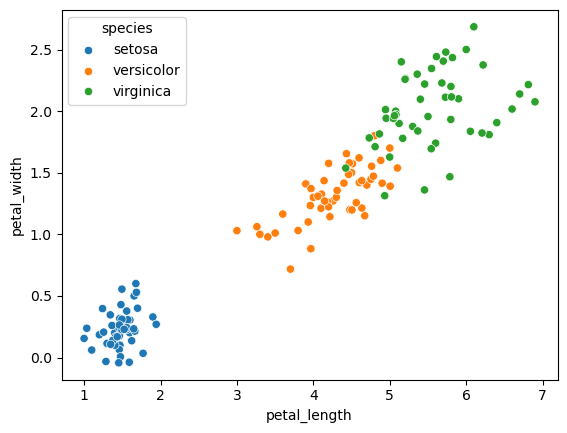

In [174]:
sns.scatterplot(data=df,x='petal_length',y='petal_width',hue='species')

#### setosa is fully separable from versicolr and virginica it is far away from those two classes it is in botton doen left
#### virginica and versicolor are slightly overlapping but mostly separable 
#### virginica has longer petals
#### versicolor lies in between setosa and virginica

<Axes: xlabel='species', ylabel='sepal_length'>

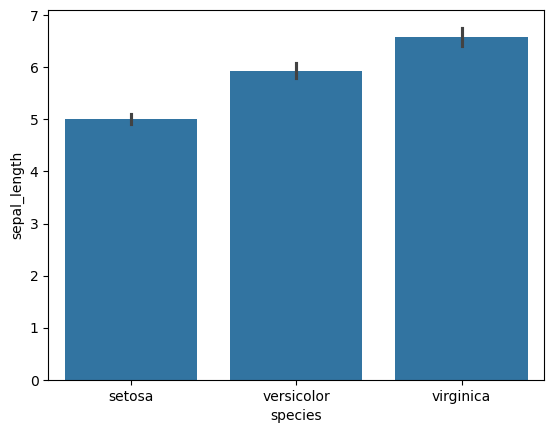

In [175]:
sns.barplot(x=df['species'],y=df['sepal_length'],data=df)

#### virginica has the largest sepal_length among the three species around 7
#### versicolor has the medium sepal _length around 6
#### setosa has the smallest average sepal_length around 5

<Axes: xlabel='species', ylabel='sepal_width'>

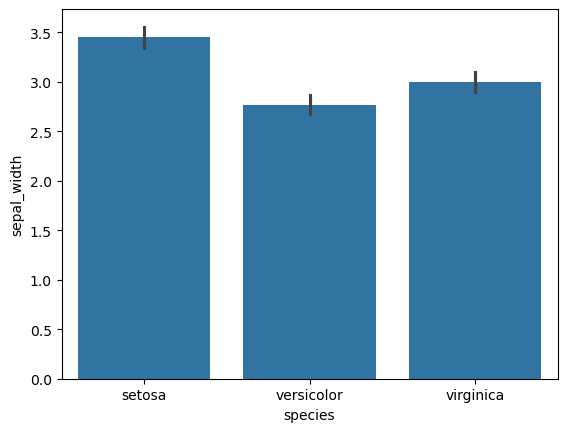

In [176]:
sns.barplot(x=df['species'],y=df['sepal_width'],data=df)

#### setosa has highest average sepal_width among three species around 3.5
#### virginca has the medium range sepa_width around 3.0
#### versicolr is some what smaller than the virginica around 2.7

<Axes: xlabel='species', ylabel='petal_length'>

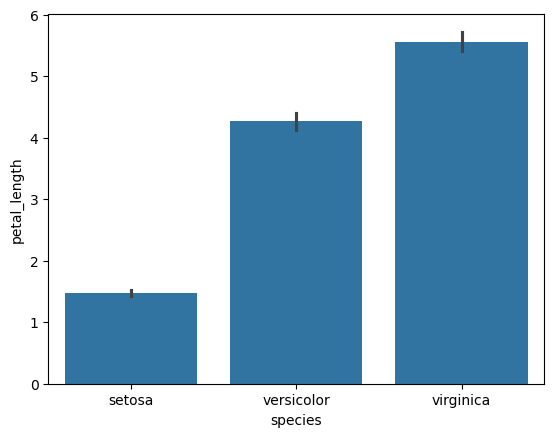

In [177]:
sns.barplot(x=df['species'],y=df['petal_length'],data=df)

#### virginica has largest average petal_length among the three species around 5 above
#### versicolor has medium range petal_length around 4
#### setosa has the smallest range petal_length around 1.5

<Axes: xlabel='species', ylabel='petal_width'>

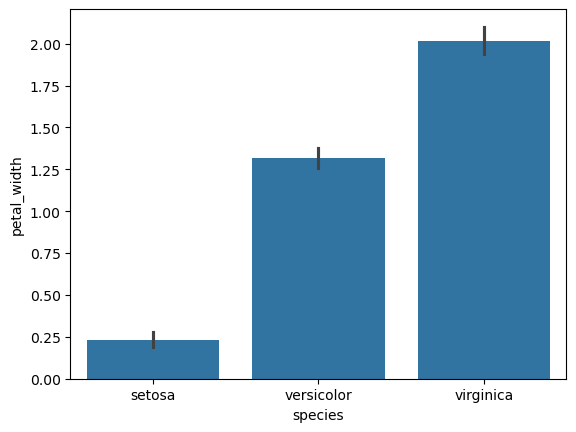

In [178]:
sns.barplot(x=df['species'],y=df['petal_width'])

#### virginica has the largest average petal length among the three species around 2.00
#### Versicolor has the medium petal length around 1.25
#### setosa has the smallest average petal length around 0.25


# Conclusion:
#### `setosa` consistently has the smallest petals and widest sepals
#### ` versicolor` typicalls in the middle across the three species across all the measurements with moderate values in both sepals and petals
#### `virginica` has the largest petals and longest sepals,in sepal_width narrow than setosa

# annova

In [179]:
from scipy.stats import f_oneway
setosa = df[df['species'] == 'setosa']['petal_length']
versicolor = df[df['species'] == 'versicolor']['petal_length']
virginica = df[df['species'] == 'virginica']['petal_length']
f_stats,p=f_oneway(setosa,versicolor,virginica)

In [180]:
p

2.469399519399816e-89

# Reject the H0 p value less than 0.05

In [181]:
setosa=df[df['species']=='setosa']['petal_width']
versicolor=df[df['species']=='versicolor']['petal_width']
virginica=df[df['species']=='virginica']['petal_width']
f_stats,p=f_oneway(setosa,versicolor,virginica)

In [182]:
p

8.03594044650546e-78

# Reject the H0 p value less than 0.05

In [183]:
setosa=df[df['species']=='setosa']['sepal_length']
virginica=df[df['species']=='virginica']['sepal_length']
versicolor=df[df['species']=='versicolor']['sepal_length']
f_stats,p=f_oneway(setosa,virginica,versicolor)

In [184]:
p

2.1641970690605623e-30

# Reject the H0 p value less than 0.05

In [185]:
setosa=df[df['species']=='setosa']['sepal_width']
virginica=df[df['species']=='virginica']['sepal_width']
versicolr=df[df['species']=='versicolor']['sepal_width']
f_stats,p=f_oneway(setosa,virginica,versicolor)

In [186]:
p

2.7842401714241897e-74

# Reject the H0 p value less than 0.05

# Multivariant analysis

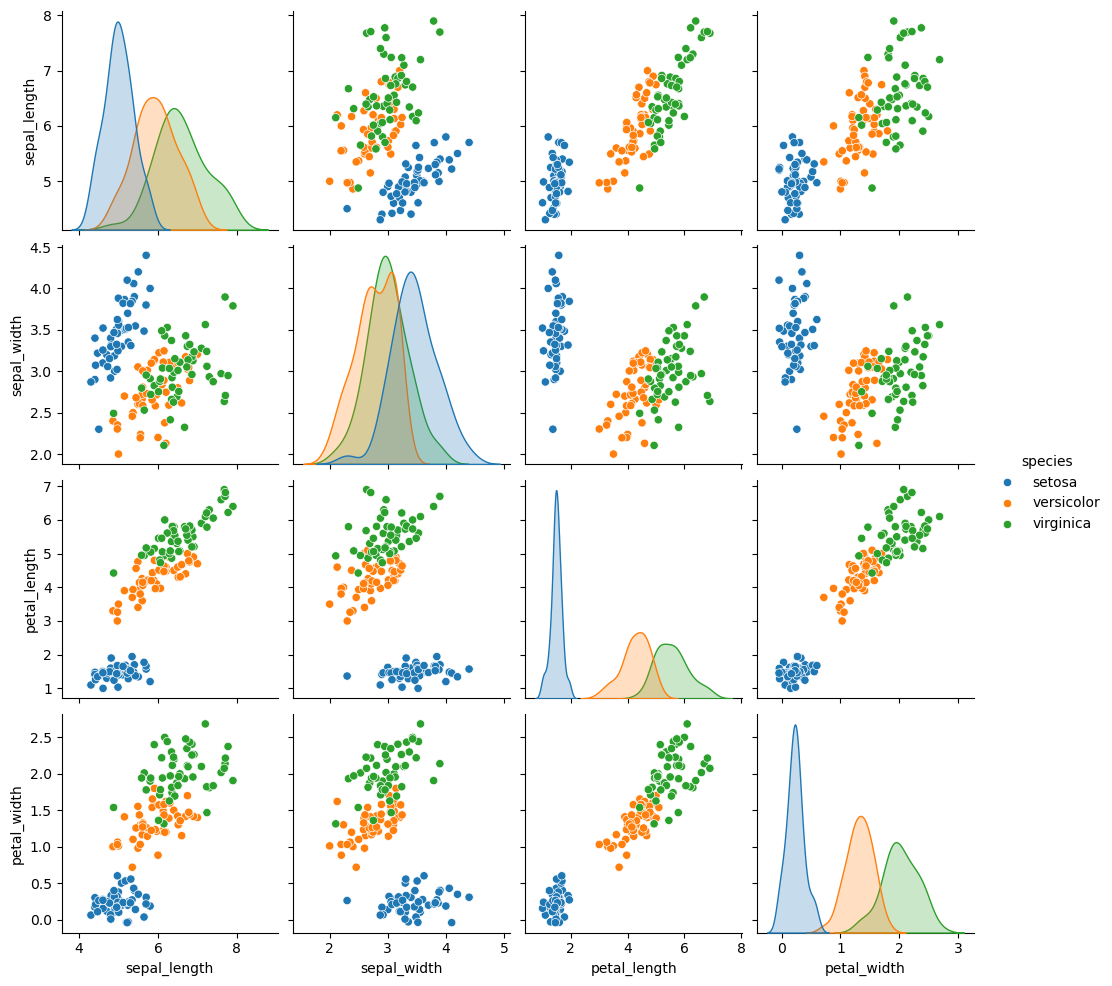

In [187]:
sns.pairplot(df,hue='species')

#### Setosa is separable from all the feautres
#### versicolor and virginica is overlapping in some feautures
#### we  can see petal feautures often have stronger separation than sepal feautures

<Axes: >

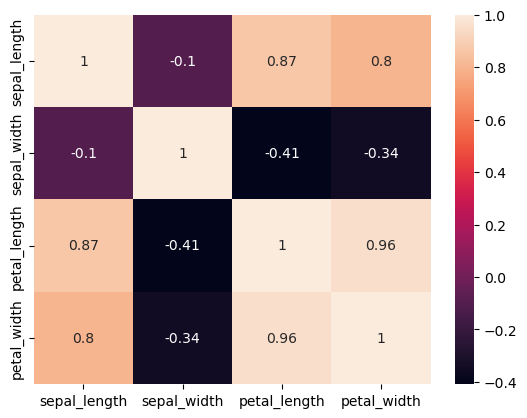

In [188]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

petal_width and petal_length has strong correlation 0.95

sepal_length and petal_length has strong correlation 0.87

sepal_width and petal_length has very weakk relation -0.41

# KNN Model

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [191]:
x=df.drop(['species'],axis=1)

In [192]:
y=df['species']

In [193]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [194]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
54,6.500000,2.800000,4.600000,1.420225
127,6.111783,3.038836,5.053711,1.942575
28,5.246858,3.352845,1.285874,-0.032190
33,5.500000,4.200000,1.343034,0.346154
58,6.600000,2.617000,4.672214,1.150865
...,...,...,...,...
149,5.700693,2.953475,5.169106,1.779148
60,4.997291,2.000000,3.500000,1.010440
36,5.427035,3.546868,1.373882,0.137861
117,7.700000,3.896542,6.700000,2.138938


In [195]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
40,4.884011,3.467250,1.241427,0.397006
15,5.700000,4.400000,1.572791,0.306068
92,5.708236,2.731022,4.187785,1.261717
71,6.062502,2.874455,3.968983,1.371053
50,7.000000,3.204576,4.700000,1.400000
62,6.000000,2.200000,3.967001,0.882868
131,7.900000,3.789272,6.400000,1.906621
39,5.250702,3.527847,1.558757,0.242388
101,5.801197,2.910298,5.121912,1.900000
144,6.702677,3.428190,5.732839,2.478949


In [196]:
y_train

54     versicolor
127     virginica
28         setosa
33         setosa
58     versicolor
          ...    
149     virginica
60     versicolor
36         setosa
117     virginica
107     virginica
Name: species, Length: 120, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [197]:
y_test

40         setosa
15         setosa
92     versicolor
71     versicolor
50     versicolor
62     versicolor
131     virginica
39         setosa
101     virginica
144     virginica
44         setosa
22         setosa
77     versicolor
93     versicolor
11         setosa
27         setosa
132     virginica
122     virginica
43         setosa
130     virginica
1          setosa
14         setosa
129     virginica
32         setosa
140     virginica
20         setosa
46         setosa
7          setosa
41         setosa
52     versicolor
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [198]:
print(x_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [199]:
y_train.shape

(120,)

In [200]:
from sklearn.neighbors import KNeighborsClassifier

In [201]:
knn=KNeighborsClassifier()

In [202]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [203]:
knn.score(x_test,y_test)

0.9666666666666667

In [204]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree')

In [205]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [206]:
knn.score(x_test,y_test)

0.9666666666666667

In [207]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm='ball_tree')

In [208]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree')

In [209]:
knn.score(x_test,y_test)

0.9666666666666667

In [210]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm='brute')

In [211]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute')

In [212]:
knn.score(x_train,y_train)

0.9583333333333334

In [213]:
knn=KNeighborsClassifier(n_neighbors=5)

In [214]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [215]:
knn.score(x_test,y_test)

0.9666666666666667

#### iam trainning the KNN model on 80% of dataset
#### I am tested the it on the remaining data 20% and acieved 93.33% accuracy
#### I changed algorithm to ball_tree and kd_tree the  accuracy is same 93.33%
#### By using algorithm brute iam getting 96.6% accuracy which is slightly higher accuracy

# Distance_based Weights

In [216]:
knn_distance=KNeighborsClassifier(n_neighbors=5,weights='distance')

In [217]:
knn_distance.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [218]:
knn_distance.score(x_test,y_test)

0.9666666666666667

# Getting K values from cross validation

In [219]:
from sklearn.model_selection import cross_val_score

In [220]:
k_value=range(1,15)
cv_scores=[]

In [221]:
for k in k_value:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
    cv_scores.append(np.mean(scores))

In [222]:
cv_scores

[0.9533333333333334,
 0.9600000000000002,
 0.9666666666666666,
 0.9533333333333334,
 0.96,
 0.96,
 0.9466666666666665,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9533333333333334]

In [223]:
cv_scores.index(max(cv_scores))

2

# Getting k value as from K fold cross validation

In [224]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7,weights='distance')

In [225]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [226]:
knn.score(x_test,y_test)

0.9666666666666667

In [227]:
knn=KNeighborsClassifier(n_neighbors=7,algorithm='ball_tree',weights='distance')

In [228]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7, weights='distance')

In [229]:
knn.score(x_test,y_test)

0.9666666666666667

In [230]:
knn=KNeighborsClassifier(n_neighbors=7,algorithm='kd_tree',weights='distance')

In [231]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7, weights='distance')

In [232]:
knn.score(x_test,y_test)

0.9666666666666667

# PCA

In [233]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [234]:
df1=df.drop('species',axis=1)

In [235]:
df1

,sepal_length,sepal_width,petal_length,petal_width
0,5.100000,3.500000,1.400000,0.200000
1,4.900000,3.000000,1.623020,0.136052
2,4.700000,3.200000,1.300000,0.114330
3,4.600000,3.100000,1.500000,0.275819
4,5.000000,3.600000,1.473211,0.273837
...,...,...,...,...
145,6.859581,2.960543,5.200000,2.257941
146,6.312109,2.413727,5.081078,1.971544
147,6.527412,2.756183,5.061262,1.963049
148,6.093601,3.488762,5.456308,2.219700


In [236]:
from sklearn.preprocessing import StandardScaler

In [237]:
scaler=StandardScaler()

In [238]:
scaler

StandardScaler()

In [239]:
scaled_data=scaler.fit_transform(df1)

In [240]:
scaled_data

array([[-0.89116754,  0.93506251, -1.347174  , -1.28552645],
       [-1.13130285, -0.16237924, -1.2204324 , -1.36857551],
       [-1.37143817,  0.27659746, -1.40400364, -1.39678508],
       [-1.49150583,  0.05710911, -1.29034435, -1.18706102],
       [-1.01123519,  1.15455086, -1.30556843, -1.18963457],
       [-0.53096456,  1.81301591, -1.17668507, -1.02578848],
       [-1.72954609,  0.71557416, -1.30365506, -1.15565747],
       [-1.07177922,  0.95503871, -1.23565271, -1.28345963],
       [-1.73164115, -0.38186759, -1.34032206, -1.32697711],
       [-1.14807906,  0.50197913, -1.30802228, -1.41539544],
       [-0.73393937,  1.37403921, -1.30798613, -1.28983005],
       [-1.25137051,  0.7145697 , -1.23351471, -1.14967009],
       [-1.25412159, -0.33990108, -1.31323564, -1.46109881],
       [-1.85170881, -0.44650617, -1.51766293, -1.46647087],
       [-0.05069392,  2.03250426, -1.46083329, -1.30528309],
       [-0.17076158,  2.91045765, -1.24897765, -1.14777761],
       [-0.54909865,  2.

In [242]:
from sklearn.decomposition import PCA

In [243]:
pca=PCA(n_components=2)

In [244]:
pca

PCA(n_components=2)

In [246]:
pca_data=pca.fit_transform(scaled_data)

In [247]:
pca_data

array([[-2.2200299 ,  0.4320813 ],
       [-2.03540814, -0.67668628],
       [-2.3972744 , -0.36336939],
       [-2.21850893, -0.59580718],
       [-2.26095217,  0.59835674],
       [-2.0119403 ,  1.39858283],
       [-2.50289896, -0.07078149],
       [-2.25339841,  0.38674925],
       [-2.33905302, -1.10098384],
       [-2.29319609, -0.07126483],
       [-2.23068569,  0.89769699],
       [-2.20833155,  0.10591323],
       [-2.16026521, -0.89419309],
       [-2.56747572, -1.21745311],
       [-2.1412776 ,  1.75547115],
       [-2.21797915,  2.54005778],
       [-2.16206398,  1.71452346],
       [-2.38387836,  0.49819407],
       [-1.91806707,  1.31044561],
       [-2.325321  ,  1.20491785],
       [-1.86727805,  0.63308719],
       [-2.31989087,  1.17983366],
       [-2.70735396,  0.24974795],
       [-1.81847263,  0.04029321],
       [-2.03511684, -0.05181921],
       [-1.92820789, -0.59252684],
       [-1.84136292,  0.50522129],
       [-2.27957753,  0.49773028],
       [-2.25284425,

In [248]:
pca.explained_variance_

array([2.90298738, 0.93363767])

In [249]:
pca_data.shape

(150, 2)

In [250]:
from sklearn.preprocessing import LabelEncoder

In [252]:
le=LabelEncoder()

In [253]:
color_label=le.fit_transform(df['species'])

Text(0.5, 1.0, ' pca of IRIS Dataset')

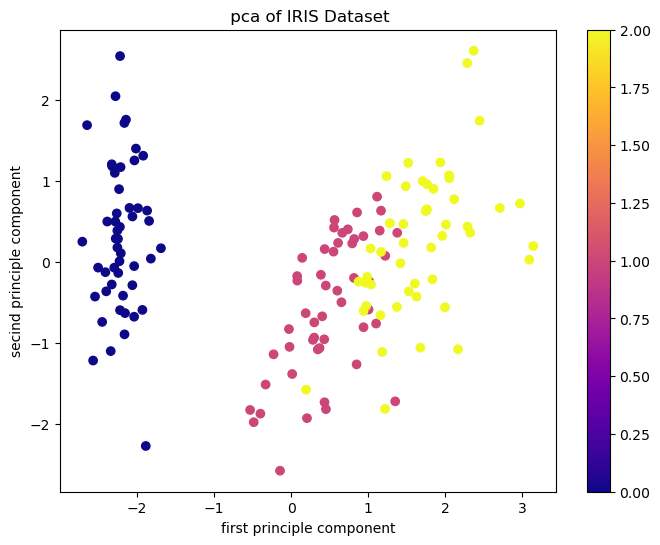

In [256]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0],pca_data[:,1],c=color_label,cmap='plasma')
plt.xlabel('first principle component')
plt.ylabel('secind principle component')
plt.colorbar()
plt.title(" pca of IRIS Dataset")

#### setosa fully separable from the two other species
#### versicolor and virginica  having overlapping regions

# t-sne

In [258]:
from sklearn.manifold import TSNE

In [260]:
tsne=TSNE(n_components=2)

In [261]:
tsne

TSNE()

In [262]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.400000,0.200000,setosa
1,4.900000,3.000000,1.623020,0.136052,setosa
2,4.700000,3.200000,1.300000,0.114330,setosa
3,4.600000,3.100000,1.500000,0.275819,setosa
4,5.000000,3.600000,1.473211,0.273837,setosa
...,...,...,...,...,...
145,6.859581,2.960543,5.200000,2.257941,virginica
146,6.312109,2.413727,5.081078,1.971544,virginica
147,6.527412,2.756183,5.061262,1.963049,virginica
148,6.093601,3.488762,5.456308,2.219700,virginica


In [263]:
df2=df.drop('species',axis=1)

In [264]:
df2

,sepal_length,sepal_width,petal_length,petal_width
0,5.100000,3.500000,1.400000,0.200000
1,4.900000,3.000000,1.623020,0.136052
2,4.700000,3.200000,1.300000,0.114330
3,4.600000,3.100000,1.500000,0.275819
4,5.000000,3.600000,1.473211,0.273837
...,...,...,...,...
145,6.859581,2.960543,5.200000,2.257941
146,6.312109,2.413727,5.081078,1.971544
147,6.527412,2.756183,5.061262,1.963049
148,6.093601,3.488762,5.456308,2.219700


In [265]:
from sklearn.preprocessing import StandardScaler

In [266]:
scaler=StandardScaler()

In [267]:
scaler

StandardScaler()

In [268]:
scaled_data=scaler.fit_transform(df2)

In [269]:
tsne_data=tsne.fit_transform(scaled_data)

In [270]:
tsne_data

array([[-2.38348694e+01,  1.04082000e+00],
       [-2.04036694e+01,  5.45786202e-01],
       [-2.12245255e+01,  1.48474348e+00],
       [-2.06008606e+01,  1.49795794e+00],
       [-2.44082241e+01,  1.64308369e+00],
       [-2.64191475e+01,  1.25442731e+00],
       [-2.18877296e+01,  2.58553720e+00],
       [-2.36079521e+01,  1.51133764e+00],
       [-1.96772156e+01,  1.37329710e+00],
       [-2.21783810e+01,  1.14521635e+00],
       [-2.52228012e+01,  1.21611941e+00],
       [-2.26984711e+01,  1.73397529e+00],
       [-1.99218063e+01,  7.58701146e-01],
       [-1.95005703e+01,  1.54890573e+00],
       [-2.69943504e+01,  7.42502332e-01],
       [-2.76308250e+01,  1.33164704e+00],
       [-2.68704472e+01,  1.52067363e+00],
       [-2.40642605e+01,  1.26695716e+00],
       [-2.62209263e+01,  4.99208540e-01],
       [-2.60183334e+01,  1.78108621e+00],
       [-2.48473225e+01, -9.77834836e-02],
       [-2.59532909e+01,  2.15559220e+00],
       [-2.29039803e+01,  2.55072212e+00],
       [-2.

Text(0.5, 1.0, ' pca of IRIS Dataset')

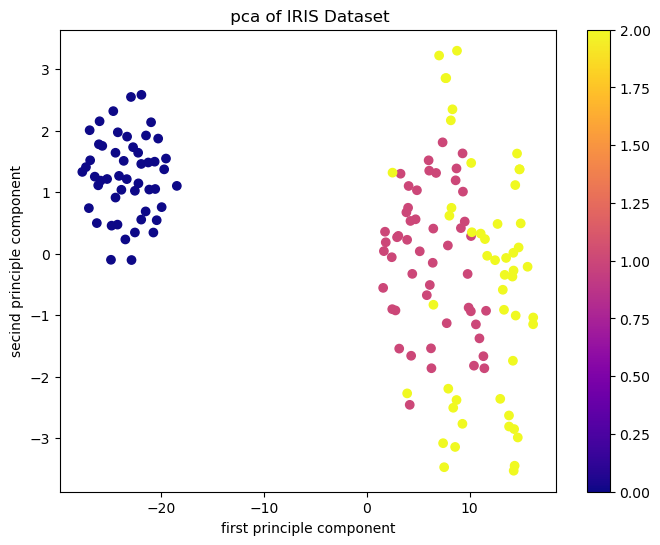

In [273]:
plt.figure(figsize=(8,6))
plt.scatter(tsne_data[:,0],tsne_data[:,1],c=color_label,cmap='plasma')
plt.xlabel('first principle component')
plt.ylabel('secind principle component')
plt.colorbar()
plt.title(" pca of IRIS Dataset")

#### setosa is completely separable form other two species in pca and t-sne
#### versicolor and virginica are overlapping more comapred to pca

In [ ]:
g